In [59]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# 讀取資料

In [11]:
data_path = 'C:\\Users\\USER\\'
df_train = pd.read_csv(data_path + 'trainmidterm.csv',header=None) #無欄位名稱，故使用header=None
df_label = pd.read_csv(data_path + 'trainLabels.csv',header=None)
df_test = pd.read_csv(data_path + 'testmidterm.csv',header=None)

In [12]:
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)
print('trainLabel shape:', df_label.shape)
df_train.head()

train shape: (1000, 40)
test shape: (9000, 40)
trainLabel shape: (1000, 1)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


# 檢視與處理 Outliers

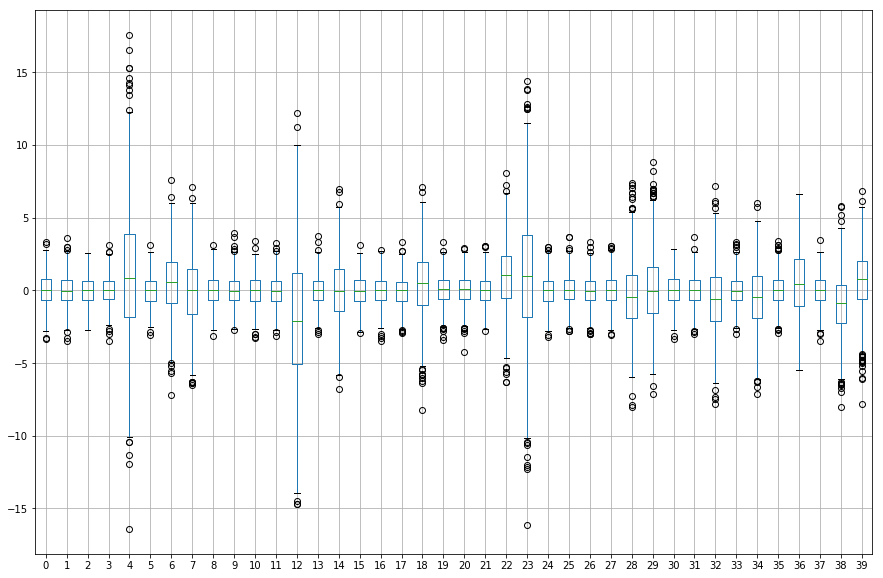

In [33]:
# 檢視這些欄位的數值範圍
plt.figure(figsize=(15,10))
df_train.boxplot()

In [34]:
# 從上面的圖檢查的結果，似乎數據都算正常

In [50]:
train = pd.concat([df_train,df_label],axis = 1,ignore_index = True)

# 觀察相關係數

In [53]:
correlations = train.corr()[40].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 8     0.037534
37    0.039376
7     0.040523
19    0.046036
22    0.046953
26    0.064633
4     0.150652
23    0.172938
28    0.207949
34    0.236116
39    0.264656
18    0.289508
12    0.460738
14    0.476171
40    1.000000
Name: 40, dtype: float64

Most Negative Correlations:
 6    -0.252976
36   -0.231733
32   -0.227027
11   -0.075276
20   -0.075135
15   -0.060556
33   -0.053928
1    -0.052153
25   -0.036663
0    -0.028058
38   -0.019690
21   -0.018645
17   -0.018021
24   -0.017121
30   -0.015797
Name: 40, dtype: float64


In [114]:
from sklearn import datasets, linear_model
# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(df_train, df_label)

# 預測測試集
y_pred = logreg.predict(df_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
y_pred[y_pred == 1.0] = 1
y_pred[y_pred == 0.0] = 0
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [121]:
# Submission dataframe
data = {'Id': range(1,9001)}
submit = pd.DataFrame(data)
submit['Solution'] = log_reg_pred

submit.head()

,Id,Solution
0,1,1.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [117]:
submit.to_csv('pred.csv', index = False)
# 結果很慘 分數為0

In [103]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [108]:
# 建立模型
clf = GradientBoostingClassifier()

# 訓練模型
clf.fit(df_train, df_label)

# 預測測試集
y_pred = clf.predict(df_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
# Submission dataframe
data = {'Id': range(1,9001)}
submit = pd.DataFrame(data)
submit['Solution'] = y_pred

submit.head()

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:
submit.to_csv('d48.csv', index = False)

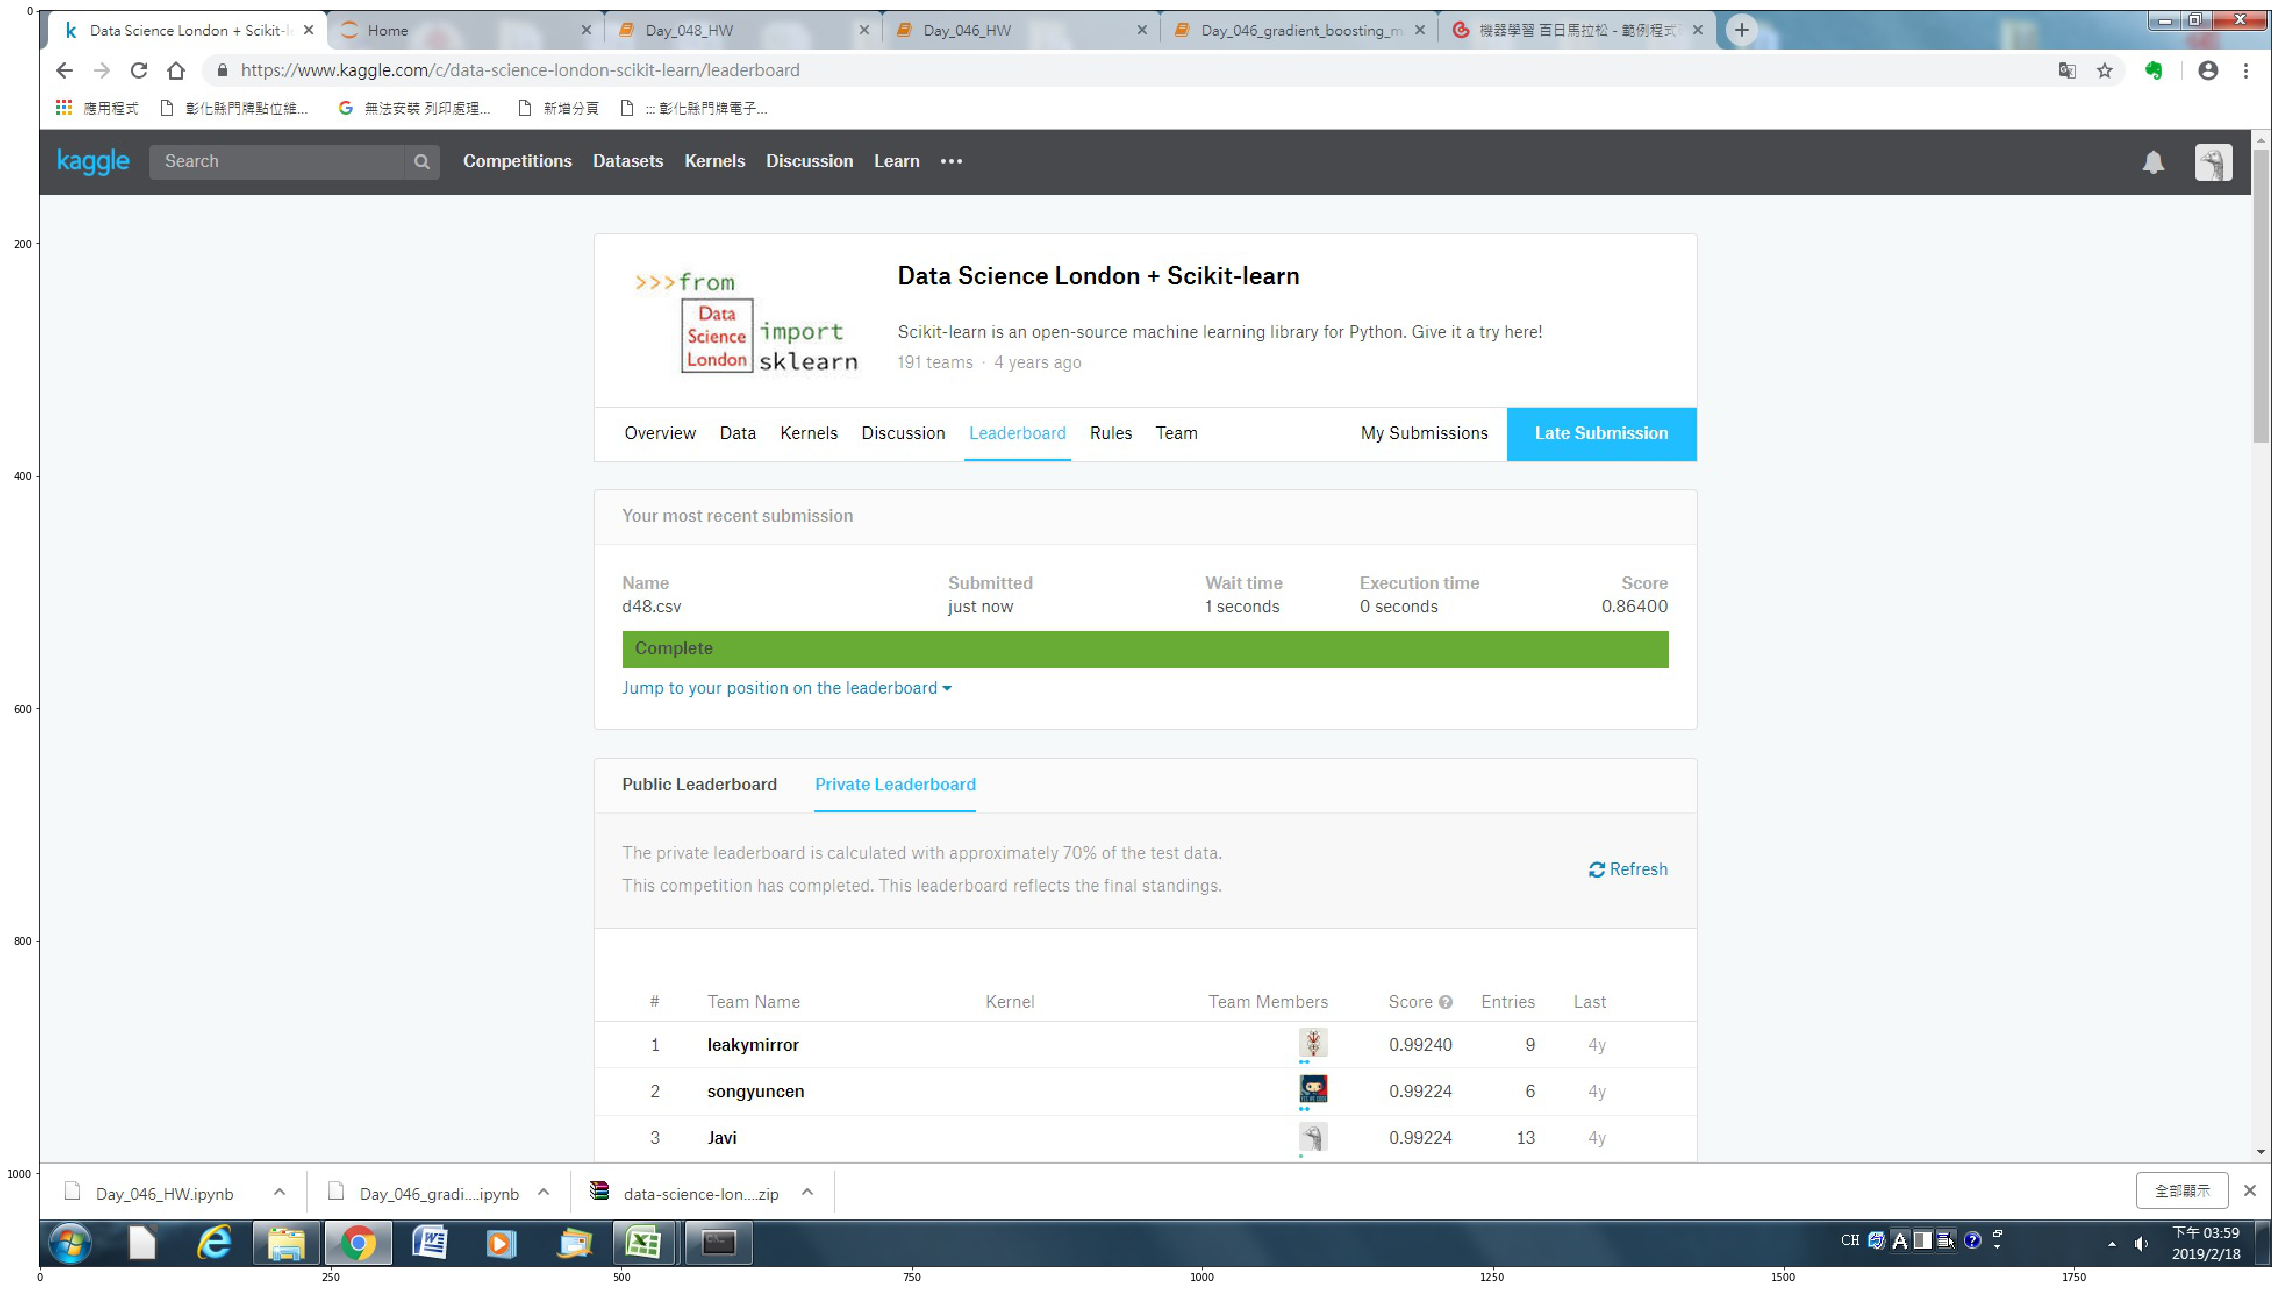

In [112]:
import skimage.io as skio
img1 = skio.imread('/Users/USER/048.jpg')
plt.figure(figsize=(40,40))
plt.imshow(img1)
plt.show()

In [ ]:
# 分數達到0.86左右